<a href="https://colab.research.google.com/github/bits-aci/bits-ml-assignment1/blob/dev/Group238_Heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Group No:</b> 238 <br>
<b>Assignment 1 - PS-6</b><br>
<b>Assignment dataset:</b> https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

<b>Group members list: All provided EQUAL contribution</b><br>

*   Sivabalan S (2022AC05637)
*   Rupp Santos (2022ac05570)
*   Srivatsan (2022AC05629)








<b>Download of data set</b>

<b> We are using google colab import option. Please make necessary changes to upload data from local drive</b>

In [300]:
# We are using Google colab import option
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


<b>Import of libraries</b>


In [301]:
# Importing all necessary libraries
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn libraries required for Training-Test data sets preparation, obtaining confusion matrix values, and model tuning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Importing necessary library package for KFold cross validation
from sklearn.model_selection import KFold

# Importing tabulate
# For displaying performance metrics in tabular format
from tabulate import tabulate

**Reading the data from CSV file**

<b> Please make necessary changes to upload data from local drive</b>

In [302]:
data_set = pd.read_csv("heart.csv")

### <b>Section - 1 : DATA VISUALIZATION AND EXPLORATION</b>

<b>1. 1. Sanity check</b>

1. Displaying few rows from the data set
2. Considering the values of Age, Cholestrol levels and heart rate at rest, the target value of 1 seems reasonable

In [303]:
data_set.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [304]:
# This command for displaying all the statistical data
print(data_set.dtypes)
print(data_set.describe())

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564


<b>1. 2. Class Imbalance check</b><br>

1.   From the visualization we can undersatand that the available data is balanced with almost equal number of data sets in positive result as well as negative result.

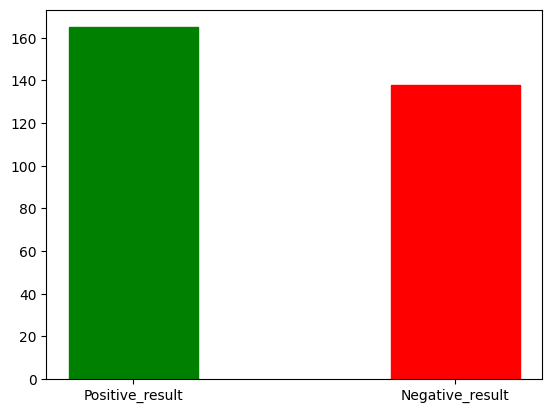

In [305]:
# Code for plotting the positive result counts and negative result count for checking the class imbalance of the data set
X_List = ['Positive_result','Negative_result']
Total_rows = data_set['target'].count()
Positive = data_set['target'].sum()
Negative =  Total_rows - Positive
Y_List = [Positive,Negative]
Bar_graph = plt.bar(X_List,Y_List ,width = 0.4)
Bar_graph[0].set_color('green')
Bar_graph[1].set_color('red')
plt.show()

<b>1. 3. Data Visualization</b>

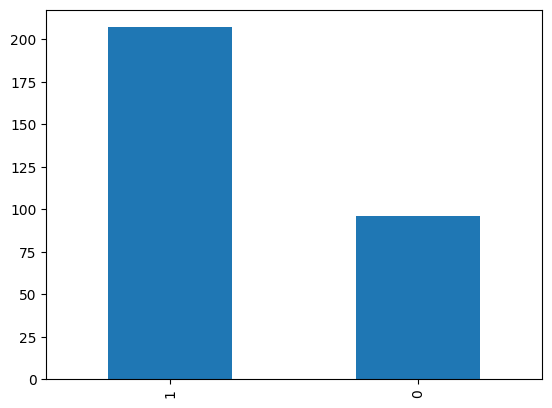

In [306]:
data_set['sex'].value_counts().plot(kind='bar')
plt.show()

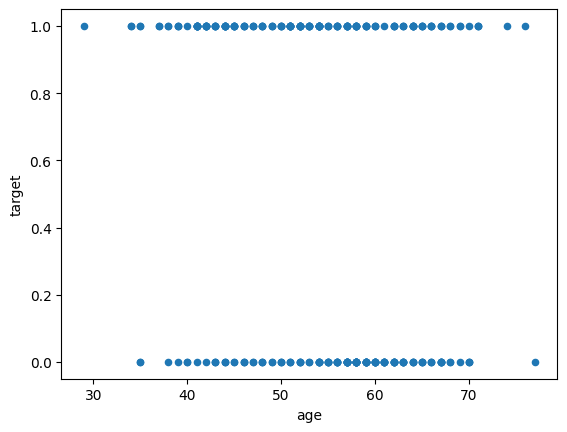

In [307]:
data_set.plot(x="age",y="target",kind="scatter")
plt.show()

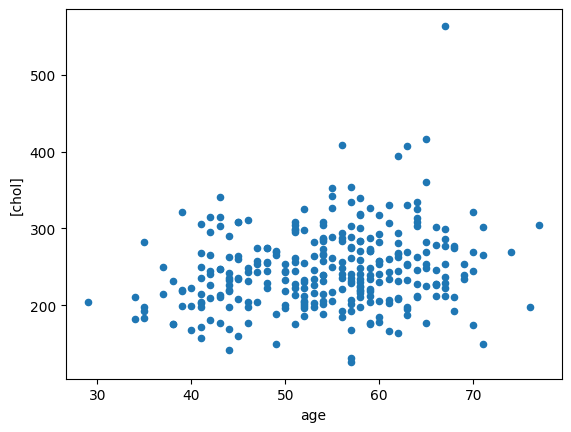

In [308]:
data_set.plot(x="age",y=["chol"],kind="scatter")
plt.show()

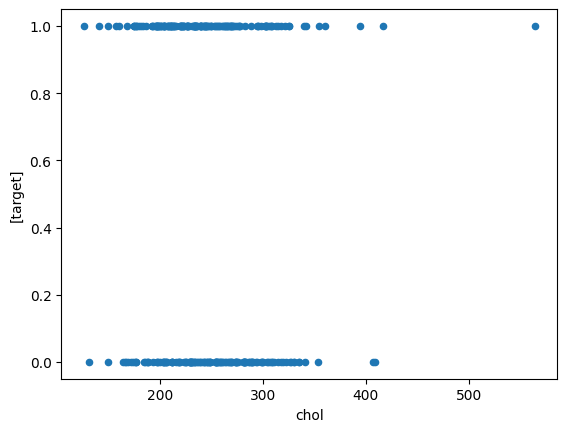

In [309]:
data_set.plot(x="chol",y=["target"],kind="scatter")
plt.show()

<b>1. 4. Correlational analysis </b>

Correlational analysis affects the feature selection
1.   Feature removing: Removing 'fbs' from the model as that particular feature has least influence on target
2. Multicolinearity: No multicolinearity noted among any of the features

Additionally, Features scaling: 'chol, 'age', 'trestbps' and 'thalach' features have high range of values (77, 200 etc) compared to other features


<Axes: >

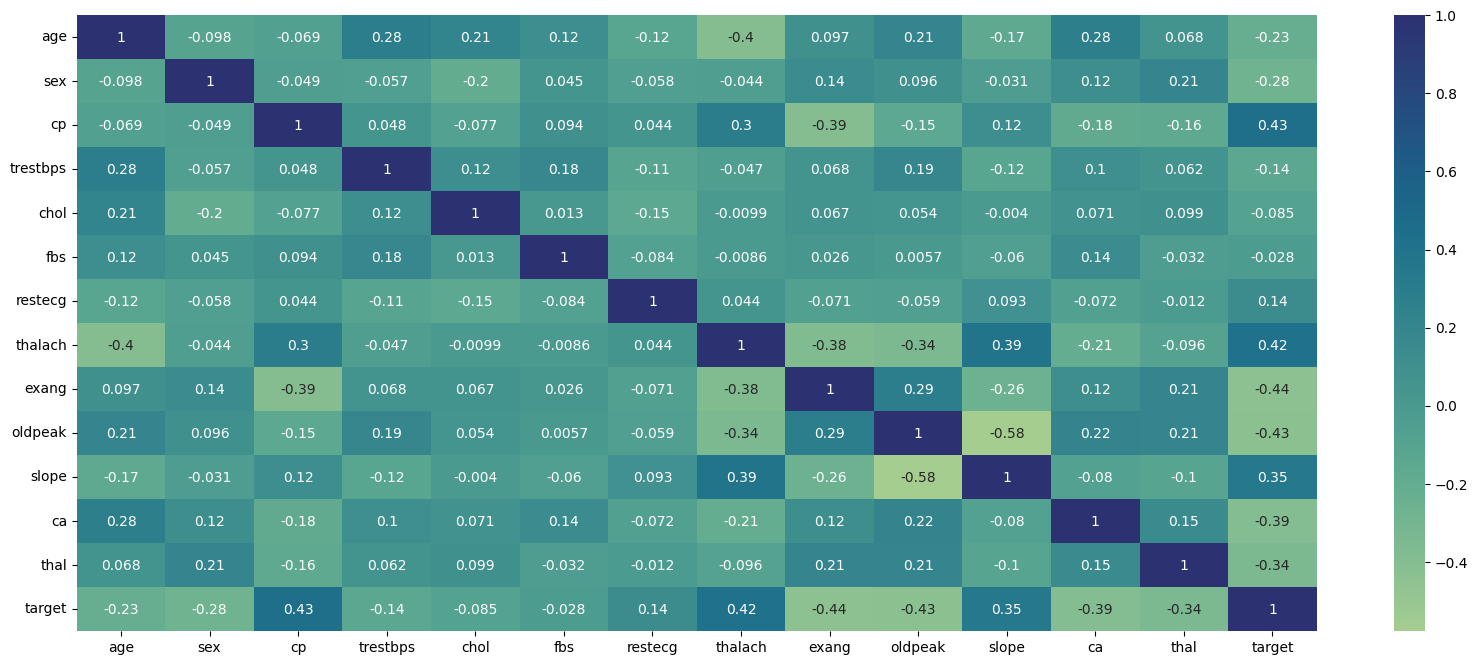

In [310]:
# Plotting heatmap to see find 1. If there is any multicollinearity, 2. If there are any features that have a very less influence on the target
plt.figure(figsize= (20, 8))
sns.heatmap(data_set.corr(), annot = True, cmap= 'crest')

### <b>Section - 2 : DATA PRE-PROCESSING AND CLEANING</b>

<b>2. 1. Description and Correctness of data in each column:</b><br><br>
1) age: Range is between 29 and 77.
<br>2) sex : data is binary 1- male and 0 - female
<br>3) cp (Chest Pain): Range is 0 to 3
<br>4) trestbps(rest Blood pressure) : Range is 94 to 200. 75% of the data is below 140 so there are some outliers.
<br>5) chol (Cholestrol level) : range is 126 to 564. Some people are having very high cholestrol level but 75% of the people are below 280.
<br>6) fbs (Fasting Blood sugar) : Data is coded to 1 if the fbs > 120 mg/dl and 0 if fbs < 120mg/dl.
<br>7) restecg (rest electro cardigraph results) : 0,1,2 are data updated based on the severity . People with 2 in restecg are very minimal.
<br>8) thalach (maximum heart rate acheived) : range is 71 to 202 . 50% of the people have recored above 153.
<br>9) exang (exercise induced angina) : 1 - caused by exercise 0 -Not caused by exercise
<br>10) oldpeak (ST depression induced by exercise relative to rest) : Range 0 to 6.2
<br>11) slope (the peak exercise ST segment): Range is 0 to 2
<br>12) ca (number of major vessels (0-4) colored by flourosopy) : 75% data is below 1.
<br>13) thal (0 = normal; 1 = fixed defect; 2 = reversable defect) : Most of the data is 2 - reversable defect. 3 is not defined but present in data set.
<br>14) target ( 0= less chance of heart attack 1= more chance of heart attack) : Range 0 to 1. All datas are within the range.







<b>2. 1. The data set is complete and it doesnt have any NULL values </b>

In [311]:
# Command for checking if there is any NULL values in the data set
print(data_set.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<b>2. 1. Finding and removing duplicates in the Data<b>

In [312]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = data_set[data_set.duplicated()]
data_set=data_set.drop_duplicates()

# Checking to see how many duplicates have been removed
# 1 duplicate entry has been removed (303 to 302 rows)
print(data_set.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

<b>2. 2. Feature Engineering: Features Scaling</b>


In [313]:
# Features scaling: 'chol, 'age', 'trestbps' and 'thalach' features have high range of values (77, 200 etc) compared to other features
# Hence taking log value for these features to have a similar scale across features
pd.options.mode.chained_assignment = None
data_set['log_trestbps'] = nm.log(data_set['trestbps'])
data_set['log_thalach'] = nm.log(data_set['thalach'])
data_set['log_age'] = nm.log(data_set['age'])
data_set['log_chol'] = nm.log(data_set['chol'])

data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,log_trestbps,log_thalach,log_age,log_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4.976734,5.010635,4.143135,5.451038
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4.867534,5.231109,3.610918,5.521461
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4.867534,5.147494,3.713572,5.318120
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4.787492,5.181784,4.025352,5.463832
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4.787492,5.093750,4.043051,5.869297


<b>2. 2. Feature Engineering: Features reduction</b> <br>
While assigning features and target columns for the model

In [314]:
# Assigning columns to X
# Removing the original columns 'chol, 'age', 'trestbps' and 'thalach' and using log value columns

# Additionally REMOVING 'fbs' as that particular feature has least influence on target
X = data_set.loc[:,~data_set.columns.isin(['target', 'chol','fbs', 'trestbps','thalach','age'])]

# Y - Target column. 'target' from data_set column
Y = data_set['target']

X.head()

,sex,cp,restecg,exang,oldpeak,slope,ca,thal,log_trestbps,log_thalach,log_age,log_chol
0,1,3,0,0,2.3,0,0,1,4.976734,5.010635,4.143135,5.451038
1,1,2,1,0,3.5,0,0,2,4.867534,5.231109,3.610918,5.521461
2,0,1,0,0,1.4,2,0,2,4.867534,5.147494,3.713572,5.318120
3,1,1,1,0,0.8,2,0,2,4.787492,5.181784,4.025352,5.463832
4,0,0,1,1,0.6,2,0,2,4.787492,5.093750,4.043051,5.869297


### <b>3. MODEL BUILDING - LOGISTIC REGRESSION</b>

<b>3. 1. Preparing Training and Test data set </b><br>

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1, y_test1] = 20% <br>
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% <br>

<b>Case 1</b> Will be considered for building Training and Test data set.
Reason:
 *   Training data set will be used to train and develop the model. Hence it should have high amount of data
*   Also low amount of data in Training set might lead to a overfitting model
*   High amount of data in Training set is necessary to build a more genaralized model




In [315]:
# 20% data assigned to Test data set and remaining 80% assigned to Training data set
(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y,test_size=.20)

<b>3. 2. Exploring K-fold cross validation </b><br>

In [316]:
# Setting K - Number of splits
kf = KFold(n_splits=5)
kfold = kf.split(X_train, Y_train)
scores = []

logisticRegr_for_kfold = LogisticRegression(max_iter=1000,fit_intercept=False,solver='liblinear',C=.2)

# Printing values: size of the fold and corresponding accuracy values
for k, (train, test) in enumerate(kfold):
    logisticRegr_for_kfold.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = logisticRegr_for_kfold.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: ', k+1, 'Training/Test Split Distribution: ',nm.bincount(Y_train.iloc[train]) , 'Accuracy: ' , score)
print('\n Cross-Validation accuracy: ', nm.mean(scores), '+ or -', nm.std(scores))

Fold:  1 Training/Test Split Distribution:  [ 83 109] Accuracy:  0.7142857142857143
Fold:  2 Training/Test Split Distribution:  [ 88 105] Accuracy:  0.8958333333333334
Fold:  3 Training/Test Split Distribution:  [ 88 105] Accuracy:  0.8541666666666666
Fold:  4 Training/Test Split Distribution:  [ 92 101] Accuracy:  0.875
Fold:  5 Training/Test Split Distribution:  [ 85 108] Accuracy:  0.8541666666666666

 Cross-Validation accuracy:  0.8386904761904763 + or - 0.06409252276141814


<b> 3. 3. 1. Model Selection </b>

1. Used GridSearchCV to find the best parameters for the model
2. Used various values for Iterations, solver option, and C values
3. 'class_weight' set as 'balanced', as we did not notice any class imbalance in the dataset
4. This being a medical diagnosis model, gave highest prioirty to RECALL value while keeping the other values optimal

<b>Other considerations for the model:</b>
1. 'random_state' set to a value to avoid dynamic train and test datasets when we re-run the model
2. 'cv' number of cross validation folds, set as 3 as we have only small amount of data
3. 'scoring' values set to focus on 'recall' value as this is a medical diagnosis model
4. 'refit' values set to focus on f1 value

<b>Final considerations for the model:</b>
1. GridsearchCV suggested solver 'newton-cg' seems to provide different recall values during every run. Hence, settled with 'liblinear'
2. Increates max_iter to 200, instead of 50 suggested by GridsearchCV to have more iterations
3. Took C and other values per GridsearchCV suggestion

In [317]:
param_grid_lr = {
    'max_iter': [50, 100, 200, 500, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
    'class_weight': ['balanced'],
    'C':[0.2,0.3,0.5,0.6,0.8,1,2,3],
    'fit_intercept':[False,True]
}

# random_state set to a value to avoid dynamic train and test datasets when we re-run the model
# 'cv' number of cross validation folds, set as 3 as we have only small amount of data
# 'scoring' values set to focus on 'recall' value as this is a medical diagnosis model
# 'refit' values set to focus on f1 value
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=3, n_jobs=-1,scoring = 'recall', refit='f1')
logModel_grid.fit(X_train, Y_train)
print(logModel_grid.best_estimator_)

results = pd.DataFrame(logModel_grid.cv_results_)
results = results.sort_values(by='rank_test_score', ascending=True)
results.iloc[:1]

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
LogisticRegression(C=0.2, class_weight='balanced', max_iter=50,
                   random_state=1234, solver='newton-cg')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_fit_intercept,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
126,0.034557,0.005172,0.010556,0.003038,0.5,balanced,True,50,lbfgs,"{'C': 0.5, 'class_weight': 'balanced', 'fit_in...",0.909091,0.863636,0.840909,0.871212,0.028346,1


In [318]:
# Logistic regression model - Used GridSearchCV, and also manually adjusted the parameters to design the final model

# List of evaluated model parameters
  # logisticRegr = LogisticRegression(max_iter=1000,fit_intercept=False,solver='liblinear',C=.2)
  # logisticRegr = LogisticRegression(max_iter=1000,fit_intercept=False,solver='liblinear',C=.5)
  # logisticRegr = LogisticRegression(max_iter=1000,fit_intercept=False,solver='saga',C=.2)
  # logisticRegr = LogisticRegression(C=0.2, class_weight='balanced', max_iter=50, random_state=1234, solver='newton-cg')
  # logisticRegr = LogisticRegression(C=0.2, class_weight='balanced', max_iter=50, random_state=1234, solver='liblinear')
  # logisticRegr = LogisticRegression(C=3, class_weight='balanced', max_iter=50, random_state=1234, solver='liblinear')
  # logisticRegr = LogisticRegression(C=0.2, class_weight='balanced', max_iter=50, random_state=1234, solver='newton-cg')
  # logisticRegr = LogisticRegression(C=0.2, class_weight='balanced', max_iter=50, random_state=1234, solver='liblinear')


# Fianlized model parameters
logisticRegr = LogisticRegression(C=0.2, class_weight='balanced', fit_intercept=False, max_iter=200, random_state=1234, solver='liblinear')
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=0.2, class_weight='balanced', fit_intercept=False,
                   max_iter=200, random_state=1234, solver='liblinear')

<b> 3. 3. 2. Performance Metrics </b>

<b> Confusion Matrix</b>

1.   Per the dataset, we are trying to predict the presence of risk of heart disease.
2. Hence, target value = 1 - presence of heart disease/attach risk is taken as TP - True Positive Value
3. Also, we will give importance to Recall value. ie. We will build a model such that we have low number of False Negatives



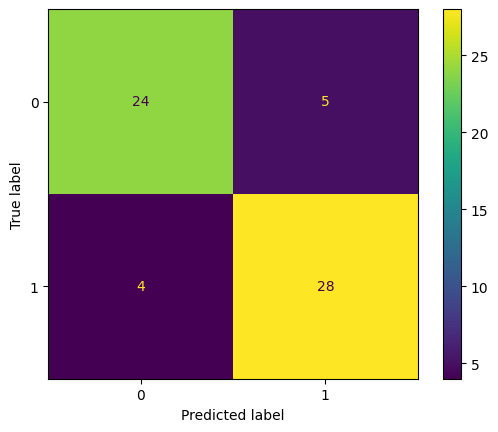

In [319]:
# Calculating Predicted values for all test data set
# And displaying Confusion matrix
predicted_values = logisticRegr.predict(X_test[:])
acutal_values = Y_test.array

cm = confusion_matrix(acutal_values, predicted_values, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

In [320]:
# Calculations required for getting performance metrics

total=sum(sum(cm))

#####Calculating Accuracy from Confusion Matrix
# (TP + TN) /(TP + FP + FN + TN)
accuracy=(cm[0,0]+cm[1,1])/total

#####Calculating Precision from Confusion Matrix
# TP/(TP + FP)
precision = cm[1,1]/(cm[1,1]+cm[0,1])


#####Calculating Sensitivity from Confusion Matrix
# TP/(TP + FN)
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])


#####Calculating Specificity from Confusion Matrix
# TN/(TN + FP)
specificity = cm[0,0]/(cm[0,0]+cm[0,1])


# Calculate score by comparing the predict 'target' value Vs actual 'target' from the Test data
f1_score = 2*((precision*sensitivity)/(precision+sensitivity))

<b> Performance Metrics </b>

In [321]:
# Performance metrics table
Performance_Metrics = [
    ['Accuracy ', accuracy],
    ['F1 score', f1_score],
    ['Sensitivity/Recall', sensitivity],
    ['Precision', precision],
    ['Specificity', specificity]
]
head = ["Metrics", "Values"]
print(tabulate(Performance_Metrics, headers=head, tablefmt="grid"))

+--------------------+----------+
| Metrics            |   Values |
+====================+==========+
| Accuracy           | 0.852459 |
+--------------------+----------+
| F1 score           | 0.861538 |
+--------------------+----------+
| Sensitivity/Recall | 0.875    |
+--------------------+----------+
| Precision          | 0.848485 |
+--------------------+----------+
| Specificity        | 0.827586 |
+--------------------+----------+


<b>Steps done to improve model and output</b> <br>
<b>Feature scaling:</b>
1. With all features included and in their original value range, the accuracy and f1 scores were around 0.78
2. Feature Scaling: Then we noticed that 'chol, 'age', 'trestbps' and 'thalach' features have high range of values (77, 200 etc) compared to other features. Hence, we took log values of those features for the model instead of the acutal values. The score improved to the range of 0.85 to 0.89<br>

<b>Feature Reduction:</b>
1. From the correlation table we identified that 'fbs' has the least influence on the target. Hence, removed 'fbs' from the model's feature columns

<b>Tuning the hyper parameters:</b>
1.   Used GridSearchCV to find the best parameters for the model
2.   Also did manual tuning to get optimal results
2.   This being a medical diagnosis model, gave higher prioirty to RECALL value while keeping the other values optimal

